In [19]:
# import your code
from encoder import encode, header_bits
from decoder import decode
import numpy as np
import matplotlib.pyplot as plt

from cued_sf2_lab.familiarisation import load_mat_img, plot_image

from simple_lbt_functions import *

from cued_sf2_lab.laplacian_pyramid import quantise
from cued_sf2_lab.laplacian_pyramid import bpp
from cued_sf2_lab.laplacian_pyramid import *


from scipy.optimize import minimize

from cued_sf2_lab.jpeg import (
    jpegenc, jpegdec, quant1, quant2, huffenc, huffdflt, huffdes, huffgen)

In [9]:
# Test encoder/decoder here
X, _ = load_mat_img('lighthouse.mat', img_info='X')
X = X - 128.0
print(X[::32,::32])


step = 20
X = quant1(X, step, step)
print(X[::32,::32])

X = quant2(X, step, step)
print(X[::32,::32])


[[  -4.    1.  -15.  -18.   -4.   -8.    0.   12.]
 [ -33.  -30.  -12.   -3.    0.  -89.   31.   16.]
 [   8.    7.  -23.  -13. -120.   74.   16.   33.]
 [  12.   -1.    0.   13.  -23.   92.   22.   18.]
 [  13.  -91.  -18.  -20.  -39.   80.   15.   22.]
 [ 103.  -86.   75.   -5.   94.   76.   64.  -50.]
 [  95.  101.   57.   89.   33.   82.   38. -109.]
 [ -38.    5.   96.  -57.   84.  -81.  -32. -100.]]
[[ 0. -0.  0.  0.  0.  0. -0. -0.]
 [-1. -1.  0.  0. -0. -4.  1. -0.]
 [-0. -0. -1.  0. -5.  3. -0.  1.]
 [-0.  0. -0. -0. -1.  4.  1. -0.]
 [-0. -4.  0. -0. -1.  3. -0.  1.]
 [ 5. -4.  3.  0.  4.  3.  3. -2.]
 [ 4.  5.  2.  4.  1.  4.  1. -5.]
 [-1. -0.  4. -2.  4. -4. -1. -4.]]
[[   0.    0.    0.    0.    0.    0.    0.    0.]
 [ -30.  -30.    0.    0.    0.  -90.   30.    0.]
 [   0.    0.  -30.    0. -110.   70.    0.   30.]
 [   0.    0.    0.    0.  -30.   90.   30.    0.]
 [   0.  -90.    0.    0.  -30.   70.    0.   30.]
 [ 110.  -90.   70.    0.   90.   70.   70.  -50.]
 [  

-977.5 943.5


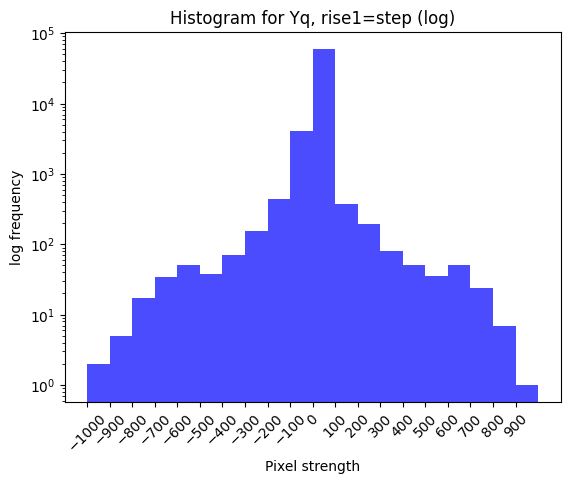

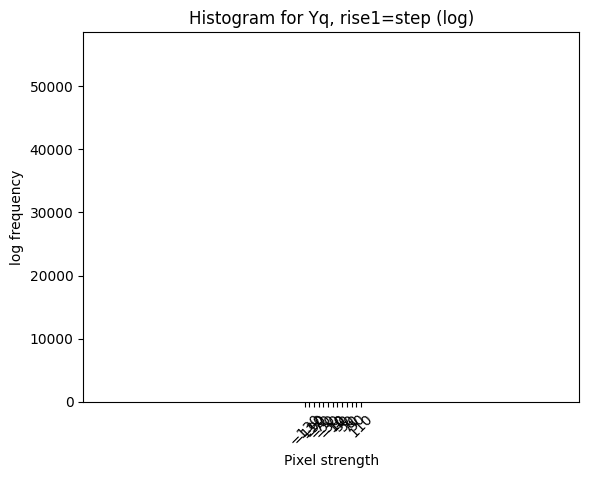

In [22]:
X, _ = load_mat_img('lighthouse.mat', img_info='X')
X = X - 128.0

k = 1
step = 17
Y = lbt(X, N=8, s=1.31)
Yq = quantise(Y, step, step*k)
print(np.min(Yq), np.max(Yq))
#print(Y[::32,::32].astype(int))
#print(Yq[::32,::32].astype(int))

# Flatten the array to create a 1D array
flattened_data = Yq.flatten()
plt.hist(flattened_data, bins=20, range=[-1000, 1000], color='blue', alpha=0.7, log=True)
plt.xticks(np.arange(-1000,1000,100))
plt.xticks(rotation=45)
plt.xlabel('Pixel strength')
plt.ylabel('log frequency')
plt.title('Histogram for Yq, rise1=step (log)')
plt.show()

# Calculate the frequencies of each unique number
unique_numbers, counts = np.unique(flattened_data, return_counts=True)
plt.bar(unique_numbers, np.array(counts), width=1, color='blue') 
plt.xticks(np.arange(-1000,1000,100))
plt.xticks(rotation=45)
plt.xlabel('Pixel strength')
plt.ylabel('log frequency')
plt.title('Histogram for Yq, rise1=step (log)')
plt.show()